## Data loading



In [1]:
import pandas as pd

try:
    df = pd.read_csv('train.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the file is in the current directory.")
    df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


Survival rate by fare and gender:


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


Survival rate by age and gender:


,Survived
Sex,
female,0.742038
male,0.188908


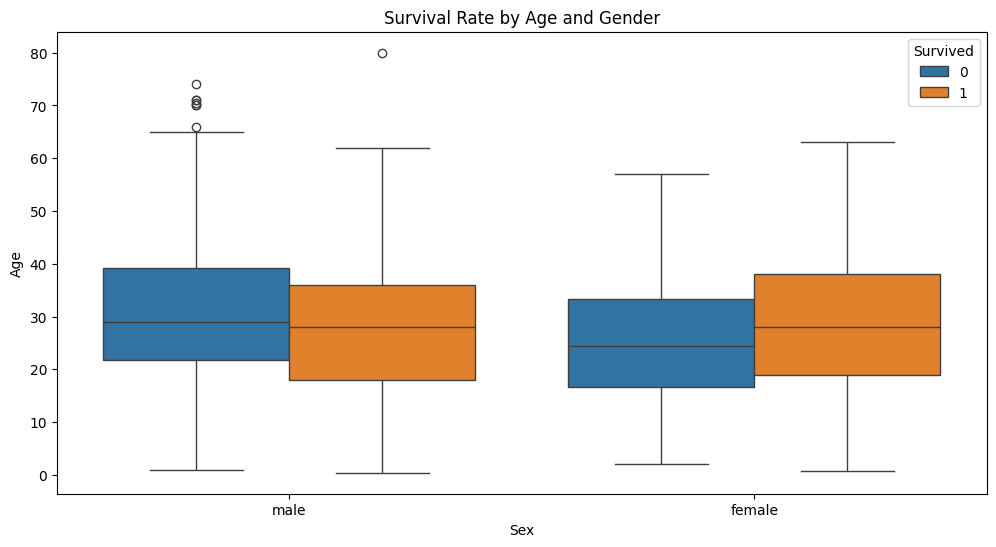

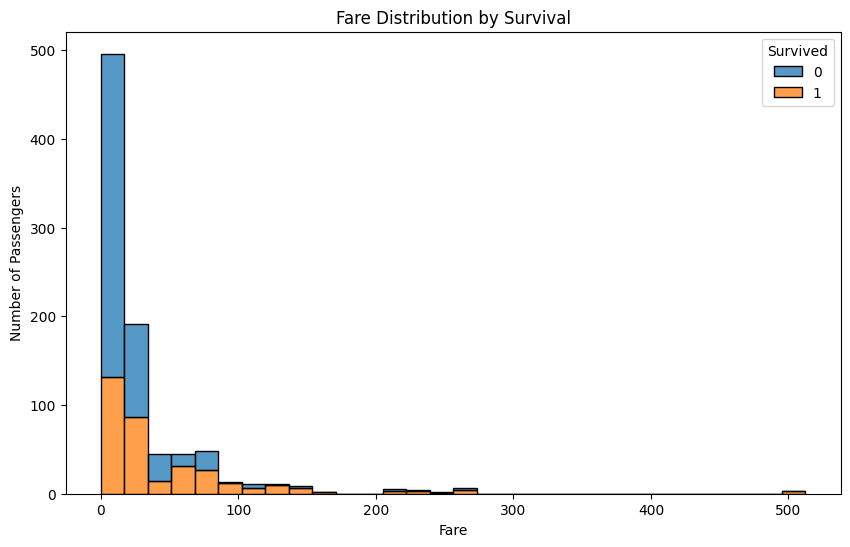

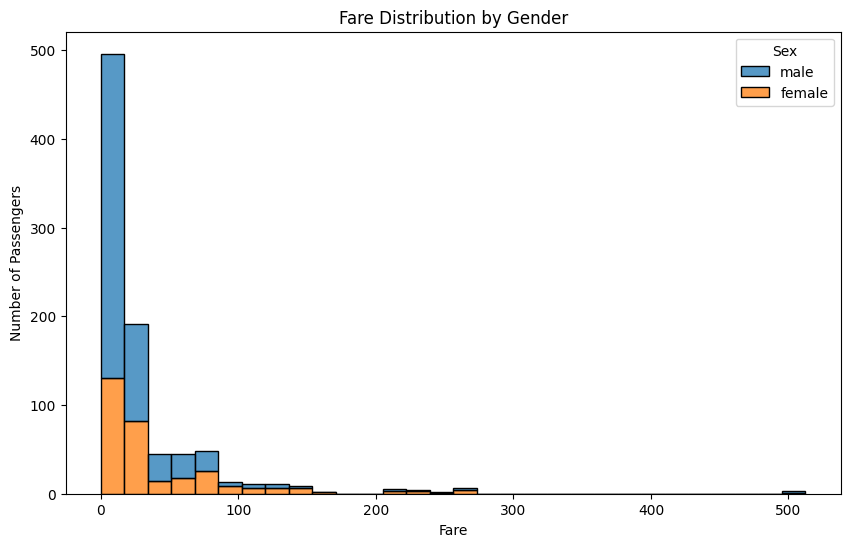

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze survival rate by fare and gender
print("Survival rate by fare and gender:")
display(df.groupby(['Sex', 'Pclass'])['Survived'].mean())

# Analyze survival rate by age and gender
print("\nSurvival rate by age and gender:")

# Group by gender and calculate survival rate
survival_by_gender = df.groupby("Sex")["Survived"].mean()
display(survival_by_gender)

# Plot survival rate by age and gender
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df)
plt.title("Survival Rate by Age and Gender")
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple="stack", bins=30)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Sex', multiple="stack", bins=30)
plt.title('Fare Distribution by Gender')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()


Fare_Quantile,0,1,2,3
Sex,,,,
female,0.697674,0.641791,0.698925,0.855856
male,0.077778,0.159236,0.279070,0.306306


Chi-squared test for male:
Chi2: 32.23899542452686, p-value: 4.6603198111785816e-07
Chi-squared test for female:
Chi2: 12.37481858641561, p-value: 0.006203515274209541


<ipython-input-3-1f2932b491f2>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby(['Sex', 'Age_Group'])['Survived'].mean().unstack()


Age_Group,Child,Teenager,Adult,Senior
Sex,,,,
female,0.593750,0.826087,0.767327,1.000000
male,0.555556,0.136364,0.179625,0.136364



Chi-squared test for male:
Chi2: 29.85846263523121, p-value: 1.4779752296653451e-06

Chi-squared test for female:
Chi2: 6.586574257348921, p-value: 0.08631004994011683


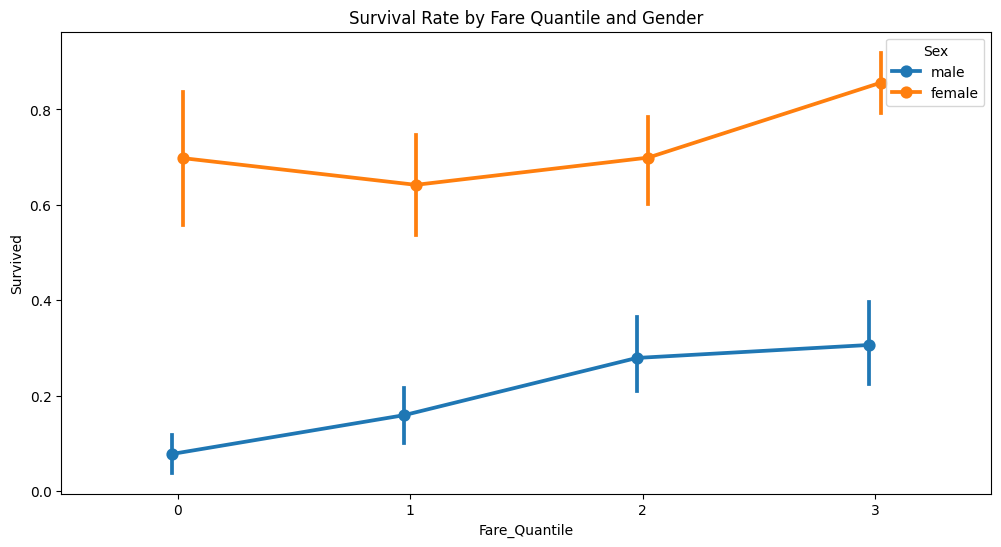

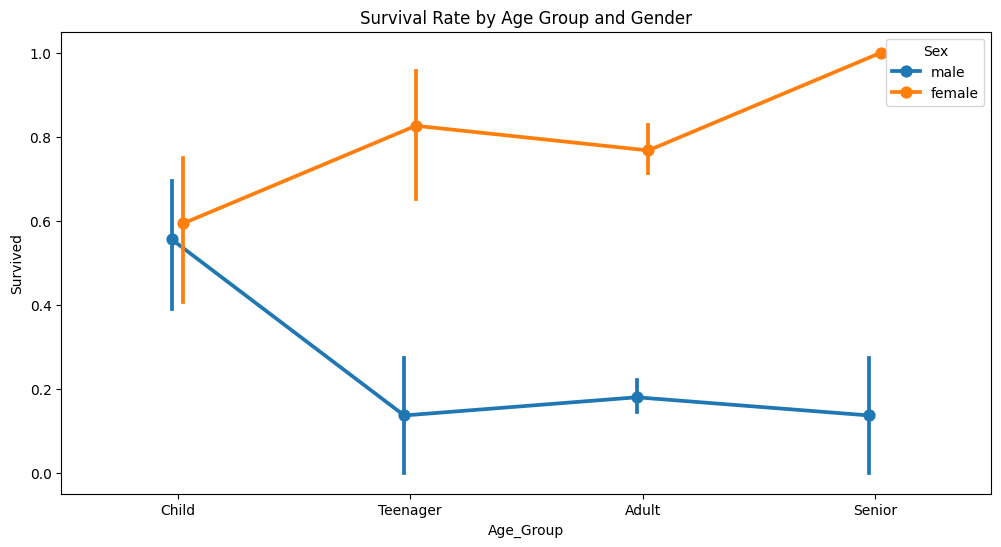

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Survival vs. Fare and Gender
# Create fare quantiles
df['Fare_Quantile'] = pd.qcut(df['Fare'], 4, labels=False)

# Calculate survival rates for each fare quantile and gender
fare_survival = df.groupby(['Sex', 'Fare_Quantile'])['Survived'].mean().unstack()
display(fare_survival)

# Chi-squared test for independence between fare quantiles and survival, stratified by gender
for gender in ['male', 'female']:
    contingency_table = pd.crosstab(df[df['Sex'] == gender]['Fare_Quantile'], df[df['Sex'] == gender]['Survived'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {gender}:\nChi2: {chi2}, p-value: {p}")


# 2. Survival vs. Age and Gender
# Create age groups
bins = [0, 12, 18, 60, np.inf]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rates for each age group and gender
age_survival = df.groupby(['Sex', 'Age_Group'])['Survived'].mean().unstack()
display(age_survival)


# Chi-squared test for independence between age groups and survival, stratified by gender
for gender in ['male', 'female']:
    contingency_table = pd.crosstab(df[df['Sex'] == gender]['Age_Group'], df[df['Sex'] == gender]['Survived'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-squared test for {gender}:\nChi2: {chi2}, p-value: {p}")

# 3. Interaction Effects
# Visualize interaction effects
plt.figure(figsize=(12, 6))
sns.pointplot(x='Fare_Quantile', y='Survived', hue='Sex', data=df, dodge=True)
plt.title('Survival Rate by Fare Quantile and Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='Age_Group', y='Survived', hue='Sex', data=df, dodge=True)
plt.title('Survival Rate by Age Group and Gender')
plt.show()


# 4. Additional Exploration (Example: Pclass)
pclass_survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
display(pclass_survival)

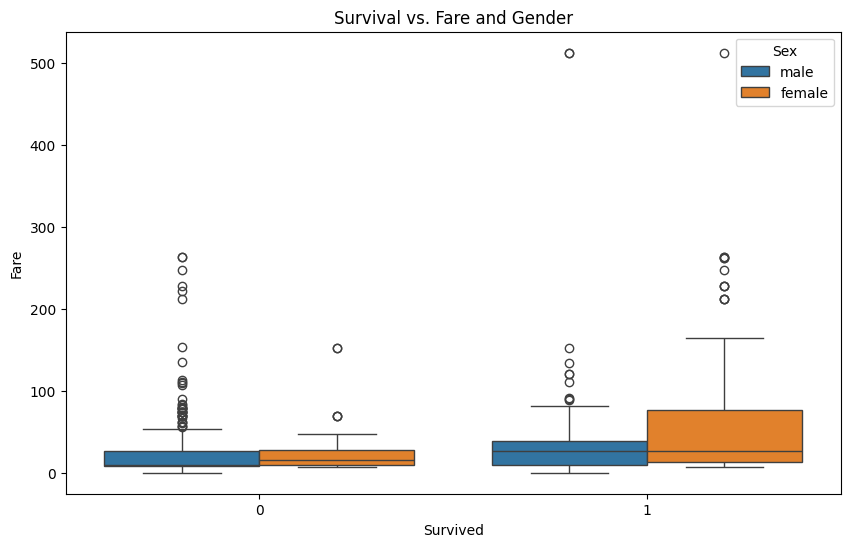

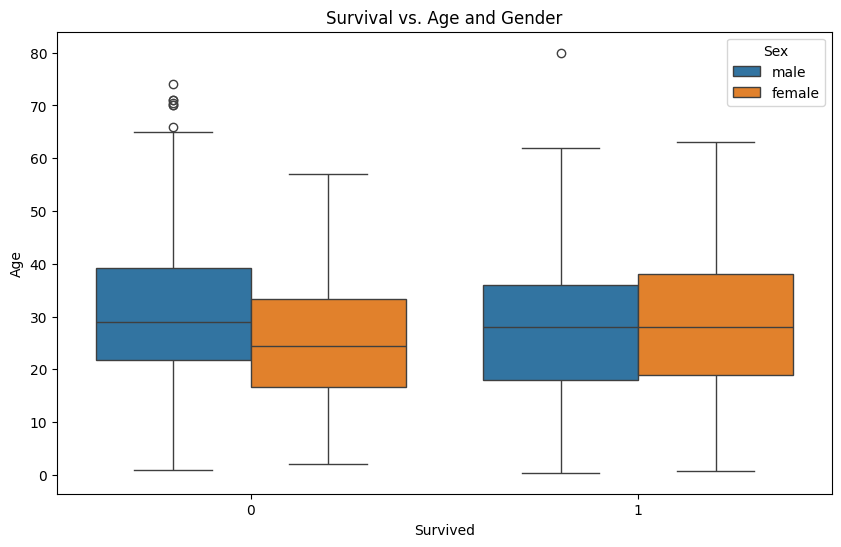

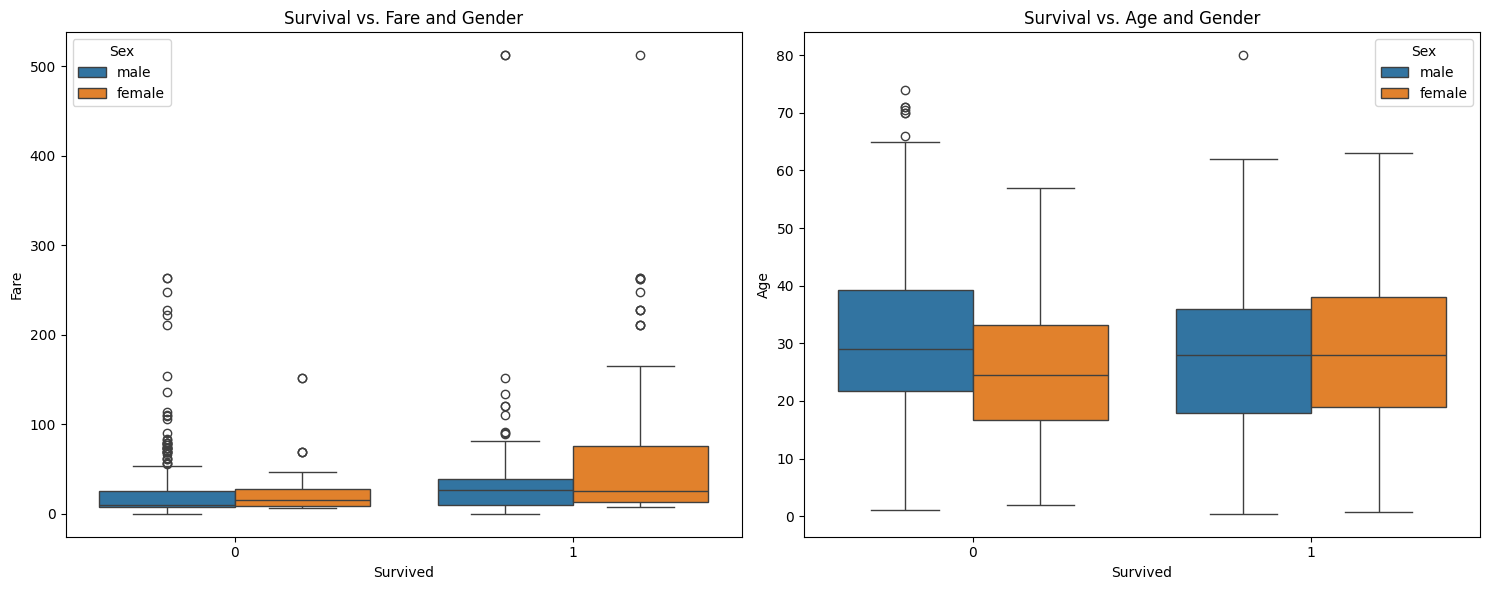

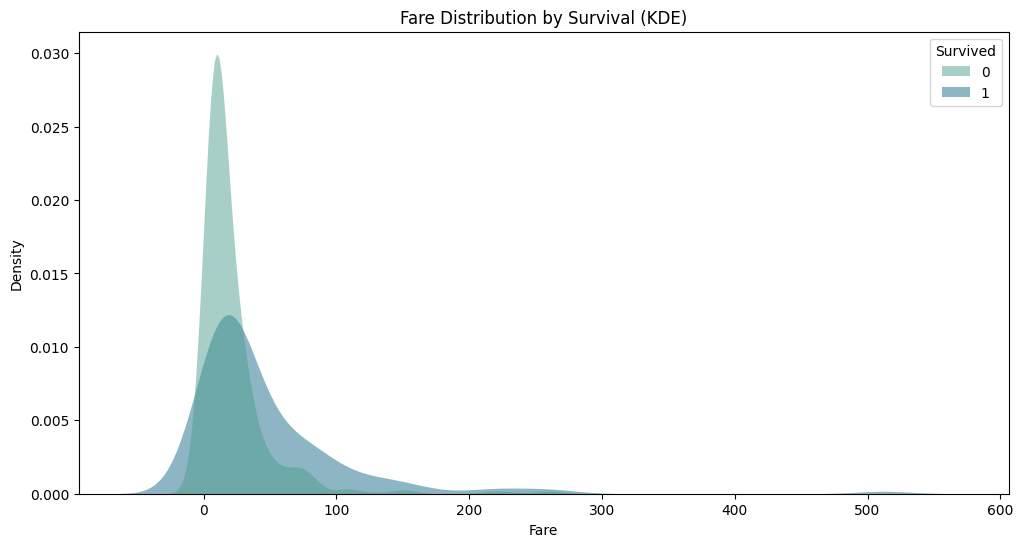

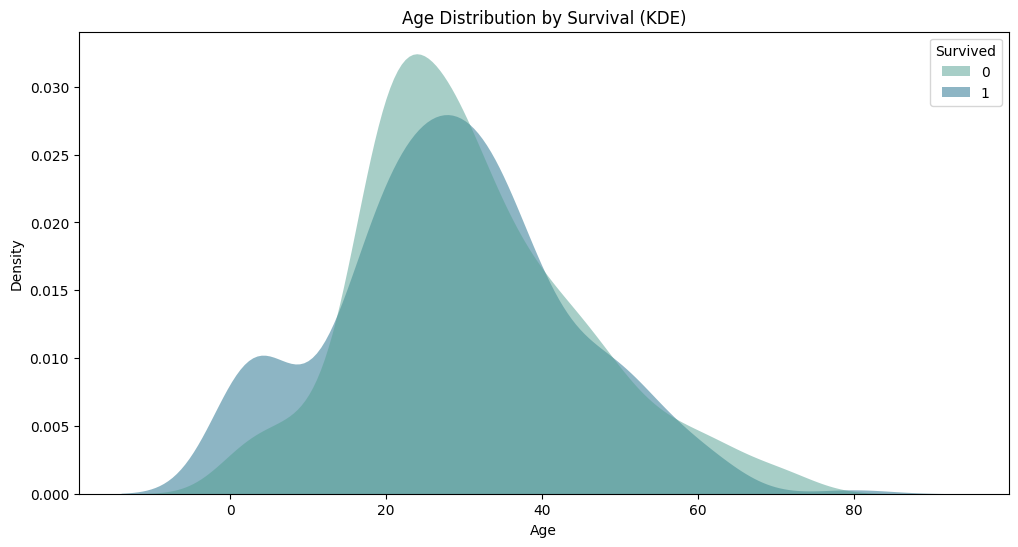

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Survival vs. Fare and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=df)
plt.title('Survival vs. Fare and Gender')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# 2. Survival vs. Age and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)
plt.title('Survival vs. Age and Gender')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# 3. Combined Visualization
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=df)
plt.title('Survival vs. Fare and Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)
plt.title('Survival vs. Age and Gender')

plt.tight_layout()
plt.show()

# 4. Additional Visualizations - Kernel Density Estimation
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
plt.title('Fare Distribution by Survival (KDE)')
plt.xlabel('Fare')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
plt.title('Age Distribution by Survival (KDE)')
plt.xlabel('Age')
plt.show()
